In [18]:
# import pandas as pd
# import os
# from datetime import timedelta

# # Folder path containing all files
# folder_path = "History and Forecast"

# # Function to read all file paths from the folder
# def get_all_file_paths(folder_path):
#     file_extensions = [".xls", ".xlsx", ".xlsm"]
#     return [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in file_extensions]

# # Function to read dates from files
# def read_dates_from_file(file_path):
#     try:
#         extension = os.path.splitext(file_path)[1].lower()
#         engine = None

#         if extension == ".xlsx" or extension == ".xlsm":
#             engine = "openpyxl"
#         elif extension == ".xls":
#             engine = "xlrd"

#         # Read the Excel file with the specified engine and set header to row 1 if necessary
#         df = pd.read_excel(file_path, engine=engine, header=3)

#         # Identify date columns
#         print(f"Columns in {file_path}: {df.columns.tolist()}")  # Debugging: Print available columns
#         date_columns = [col for col in df.columns if "date" in col.lower()]
        
#         if date_columns:
#             dates = pd.to_datetime(df[date_columns[0]], errors='coerce').dropna().unique()
#             return sorted(dates)
#         else:
#             print(f"No date column found in {file_path}")
#             return []
#     except Exception as e:
#         print(f"Error reading {file_path}: {e}")
#         return []

# # Collect all file paths from the folder
# file_paths = get_all_file_paths(folder_path)

# # Collect all dates from all files
# all_dates = []
# for file_path in file_paths:
#     print(f"Reading file: {file_path}")
#     file_dates = read_dates_from_file(file_path)
#     all_dates.extend(file_dates)

# # Remove duplicates and sort all dates
# all_dates = sorted(set(all_dates))

# # Check for missing dates
# missing_dates = []
# for i in range(1, len(all_dates)):
#     expected_date = all_dates[i - 1] + timedelta(days=1)
#     actual_date = all_dates[i]
#     if actual_date != expected_date:
#         # Add all dates that are missing in the gap
#         gap_start = expected_date
#         while gap_start < actual_date:
#             missing_dates.append(gap_start)
#             gap_start += timedelta(days=1)

# if missing_dates:
#     print("Missing dates found:")
#     for date in missing_dates:
#         print(date.strftime("%Y-%m-%d"))
# else:
#     print("No missing dates. All dates are in continuous sequence.")


In [19]:
# import os
# import pandas as pd

# def convert_excel_to_csv(input_folder, output_folder):
#     """
#     Converts all .xls, .xlsx, and .xlsm files in the input_folder to CSV format.
#     Each sheet in an Excel file is saved as a separate CSV file.
#     """
#     os.makedirs(output_folder, exist_ok=True)  # Ensure output folder exists

#     # Supported Excel file extensions
#     excel_extensions = (".xls", ".xlsx", ".xlsm")

#     # Loop through all files in the input folder
#     for file_name in os.listdir(input_folder):
#         if file_name.endswith(excel_extensions):
#             input_file_path = os.path.join(input_folder, file_name)
            
#             try:
#                 # Read the Excel file (all sheets)
#                 excel_data = pd.read_excel(input_file_path, sheet_name=None)

#                 # Convert each sheet to CSV
#                 for sheet_name, df in excel_data.items():
#                     # Generate CSV file name based on sheet name
#                     safe_sheet_name = "".join(c if c.isalnum() else "_" for c in sheet_name)
#                     csv_file_name = f"{os.path.splitext(file_name)[0]}_{safe_sheet_name}.csv"
#                     output_file_path = os.path.join(output_folder, csv_file_name)

#                     # Save to CSV
#                     df.to_csv(output_file_path, index=False, encoding='utf-8')
#                     print(f"Converted: {file_name} (Sheet: {sheet_name}) -> {csv_file_name}")

#             except Exception as e:
#                 print(f"Failed to convert {file_name}: {str(e)}")

# input_directory = "History and Forecast"
# output_directory = "History and Forecast CSV"
# convert_excel_to_csv(input_directory, output_directory)


### 20230201 - 20231025

### *Data Cleaning*

In [2]:
# Reload necessary libraries after execution state reset
import pandas as pd

# Load the uploaded CSV file
file_path = "History and Forecast CSV\History and Forecast Report 20230201 - 20231025_History_and_Forecast_Report.csv"

# Read the CSV file
df_1 = pd.read_csv(file_path, skiprows=3)

# Convert Date column to datetime format
df_1.rename(columns={df_1.columns[0]: "Date"}, inplace=True)  # Explicitly rename date column
df_1["Date"] = pd.to_datetime(df_1["Date"], errors="coerce")

df_1.dropna(subset=["Date"], inplace=True)  # Drop rows with missing dates

redundant_columns = [
    "Individual Tentative", "Confirmed Group ARR", "Tentative Group Revenue", "Tentative Group ARR", "Hold","Group Confirm", "Individual Tentative", "Group Tentative", "Inclusion Revenue"
]
df_1.drop(columns=redundant_columns, inplace=True)

# Display the first few rows to understand its structure
df_1.head()


,Date,Day,Rooms Sold,Rooms for Sale,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Individual Revenue,Individual ARR,Confirmed Group Revenue,Total Room Inventory
0,2023-02-01,Wednesday,116.0,1.0,37.0,0.0,2.0,118.0,97.48,1525371.79,13149.76,33.0,11.0,155.0,1258155.67,10662.34,267216.12,119.0
1,2023-02-02,Thursday,115.0,2.0,29.0,0.0,3.0,118.0,95.83,1448656.84,12597.02,29.0,10.0,159.0,1193440.72,10113.90,255216.12,120.0
2,2023-02-03,Friday,117.0,1.0,36.0,0.0,2.0,119.0,97.50,1532358.27,13097.08,35.0,10.0,173.0,1277142.15,10732.29,255216.12,120.0
3,2023-02-04,Saturday,117.0,0.0,60.0,2.0,2.0,121.0,96.69,1526782.32,13049.42,60.0,9.0,189.0,931703.35,7700.03,595078.97,121.0
4,2023-02-05,Sunday,105.0,8.0,50.0,2.0,3.0,110.0,88.98,1499626.34,14282.16,62.0,13.0,173.0,1000437.19,9094.88,499189.15,118.0


In [7]:
# 1. Summary Statistics

# Get basic info
print("Summary")
summary_info = df_1.info()

# Get summary statistics for numeric columns
print("Summary Statistics for Numerical cols")
summary_stats = df_1.describe()

# Check missing values
print("Missing Values")
missing_values = df_1.isnull().sum()

print("Zero Values")
zero_values = df_1[df_1 == 0].count()

# Display results
# summary_info, summary_stats, missing_values, zero_values


Summary
<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 0 to 266
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     267 non-null    datetime64[ns]
 1   Day                      267 non-null    object        
 2   Rooms Sold               267 non-null    float64       
 3   Rooms for Sale           267 non-null    float64       
 4   Arrival Rooms            267 non-null    float64       
 5   Compliment Rooms         267 non-null    float64       
 6   House Use                267 non-null    float64       
 7   Individual Confirm       267 non-null    float64       
 8   Occupancy %              267 non-null    float64       
 9   Room Revenue             267 non-null    float64       
 10  ARR                      267 non-null    float64       
 11  Departure Rooms          267 non-null    float64       
 12  OOO Rooms                267 non-

In [8]:
missing_values

Date                       0
Day                        0
Rooms Sold                 0
Rooms for Sale             0
Arrival Rooms              0
Compliment Rooms           0
House Use                  0
Individual Confirm         0
Occupancy %                0
Room Revenue               0
ARR                        0
Departure Rooms            0
OOO Rooms                  0
Pax                        0
Individual Revenue         0
Individual ARR             0
Confirmed Group Revenue    0
Total Room Inventory       0
Weekday                    0
dtype: int64

In [9]:
zero_values

Date                         0
Day                          0
Rooms Sold                   0
Rooms for Sale              18
Arrival Rooms                0
Compliment Rooms           143
House Use                    0
Individual Confirm           0
Occupancy %                  0
Room Revenue                 0
ARR                          0
Departure Rooms              0
OOO Rooms                    0
Pax                          0
Individual Revenue           5
Individual ARR               5
Confirmed Group Revenue      0
Total Room Inventory         0
Weekday                      0
dtype: int64

### *EDA*

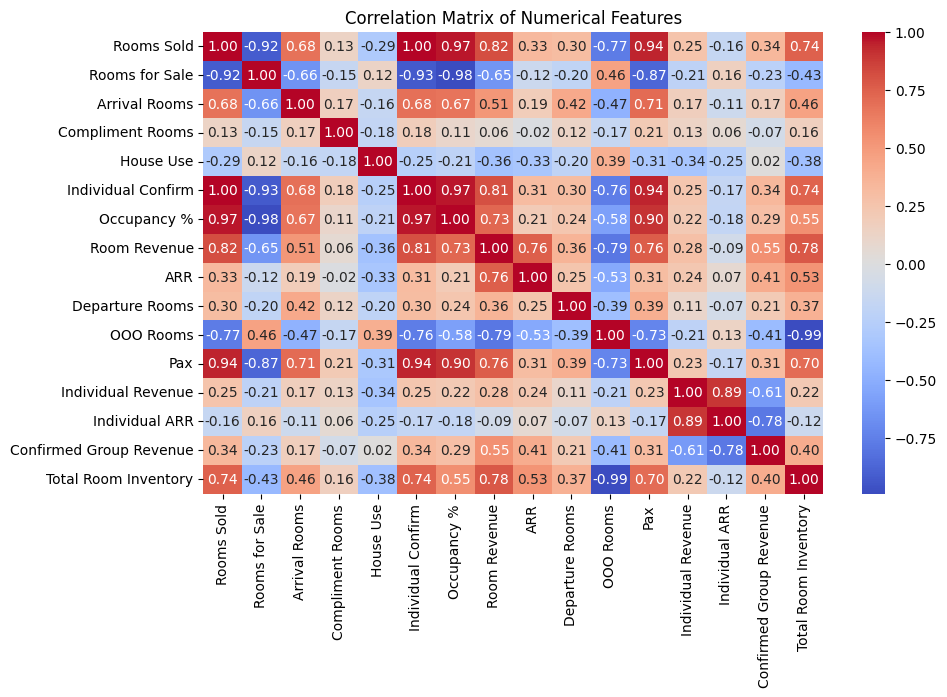

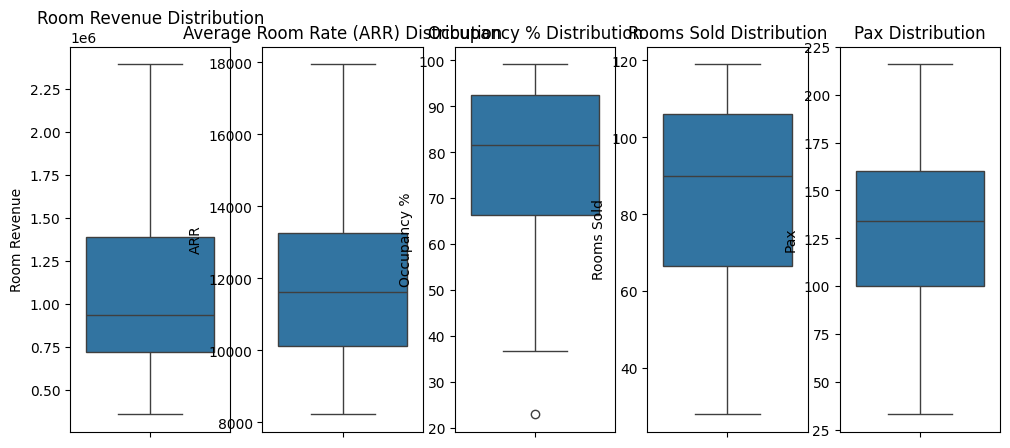

C:\Users\praya\AppData\Local\Temp\ipykernel_50716\3337154624.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_avg_revenue.index, y=weekday_avg_revenue.values, palette="viridis")


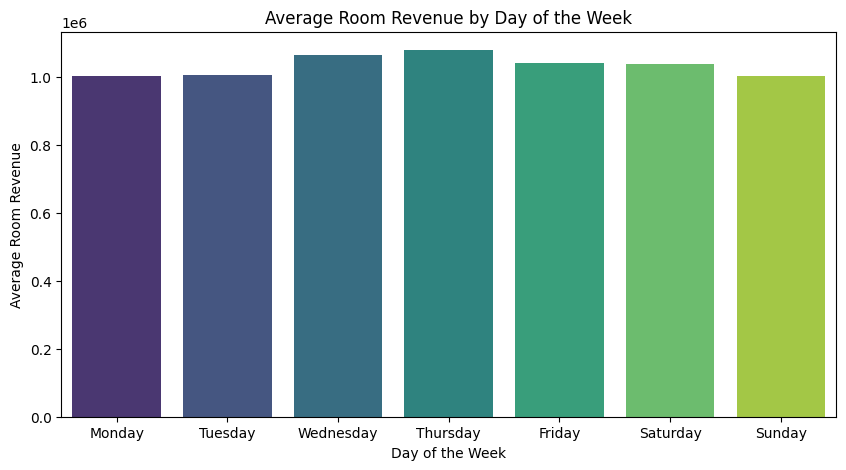

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns to avoid string conversion issues
numeric_columns = df_1.select_dtypes(include=["number"]).columns

# 1. Correlation Heatmap (Excluding Non-Numeric Columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df_1[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# 2. Boxplots for Outlier Detection in Revenue and ARR
fig, axes = plt.subplots(1, 5, figsize=(12, 5))
sns.boxplot(y=df_1["Room Revenue"], ax=axes[0])
axes[0].set_title("Room Revenue Distribution")
sns.boxplot(y=df_1["ARR"], ax=axes[1])
axes[1].set_title("Average Room Rate (ARR) Distribution")
sns.boxplot(y=df_1["Occupancy %"], ax=axes[2])
axes[2].set_title("Occupancy % Distribution")
sns.boxplot(y=df_1["Rooms Sold"], ax=axes[3])
axes[3].set_title("Rooms Sold Distribution")
sns.boxplot(y=df_1["Pax"], ax=axes[4])
axes[4].set_title("Pax Distribution")
plt.show()

# 3. Weekly Trend Analysis: Average Revenue Per Day
df_1["Weekday"] = df_1["Date"].dt.day_name()
weekday_avg_revenue = df_1.groupby("Weekday")["Room Revenue"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_avg_revenue.index, y=weekday_avg_revenue.values, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Average Room Revenue")
plt.title("Average Room Revenue by Day of the Week")
plt.show()


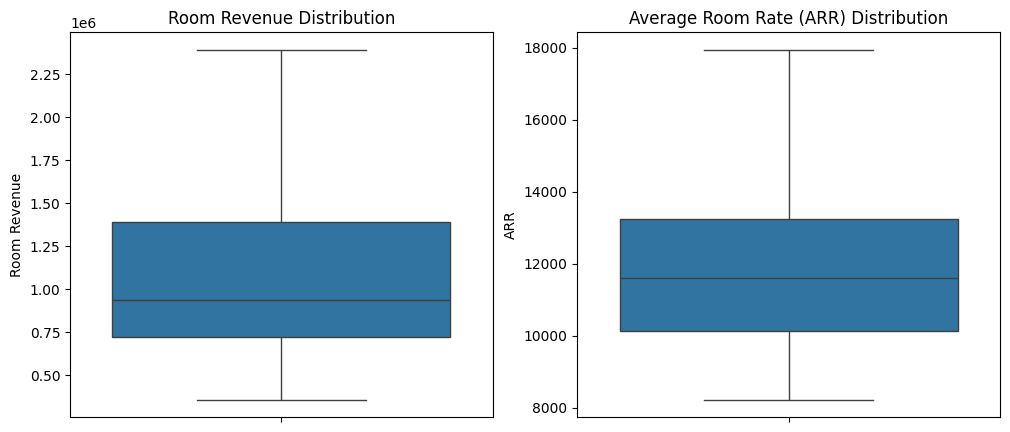

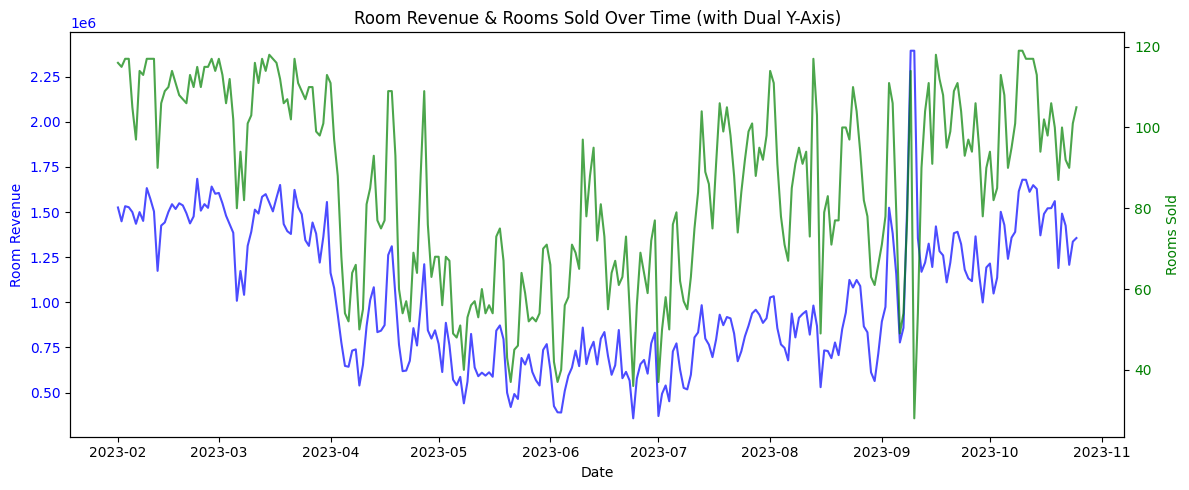

In [ ]:
# # Check for revenue outliers
# q1, q3 = df_1["Room Revenue"].quantile([0.25, 0.75])
# iqr = q3 - q1
# lower_bound = q1 - 1.5 * iqr
# upper_bound = q3 + 1.5 * iqr

# # Replace extreme values with upper bound (capping method)
# df_1["Room Revenue"] = df_1["Room Revenue"].apply(lambda x: upper_bound if x > upper_bound else x)

# Compute IQR bounds for Room Revenue and ARR
q1_revenue, q3_revenue = df_1["Room Revenue"].quantile([0.25, 0.75])
iqr_revenue = q3_revenue - q1_revenue
lower_bound_revenue = q1_revenue - 1.5 * iqr_revenue
upper_bound_revenue = q3_revenue + 1.5 * iqr_revenue

q1_arr, q3_arr = df_1["ARR"].quantile([0.25, 0.75])
iqr_arr = q3_arr - q1_arr
lower_bound_arr = q1_arr - 1.5 * iqr_arr
upper_bound_arr = q3_arr + 1.5 * iqr_arr

# Apply capping to Room Revenue
df_1["Room Revenue"] = df_1["Room Revenue"].apply(
    lambda x: upper_bound_revenue if x > upper_bound_revenue else (lower_bound_revenue if x < lower_bound_revenue else x)
)

# Apply capping to ARR
df_1["ARR"] = df_1["ARR"].apply(
    lambda x: upper_bound_arr if x > upper_bound_arr else (lower_bound_arr if x < lower_bound_arr else x)
)

# Box plots for Room Revenue and ARR after outlier capping
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# sns.boxplot(y=df_1["Room Revenue"], ax=axes[0])
# axes[0].set_title("Room Revenue Distribution")
# sns.boxplot(y=df_1["ARR"], ax=axes[1])
# axes[1].set_title("Average Room Rate (ARR) Distribution")
# plt.show()

# Re-plot with secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Room Revenue
ax1.plot(df_1["Date"], df_1["Room Revenue"], label="Room Revenue", color="blue", alpha=0.7)
ax1.set_xlabel("Date")
ax1.set_ylabel("Room Revenue", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Secondary axis for Rooms Sold
ax2 = ax1.twinx()
ax2.plot(df_1["Date"], df_1["Rooms Sold"], label="Rooms Sold", color="green", alpha=0.7)
ax2.set_ylabel("Rooms Sold", color="green")
ax2.tick_params(axis="y", labelcolor="green")

plt.title("Room Revenue & Rooms Sold Over Time (with Dual Y-Axis)")
fig.tight_layout()
plt.show()

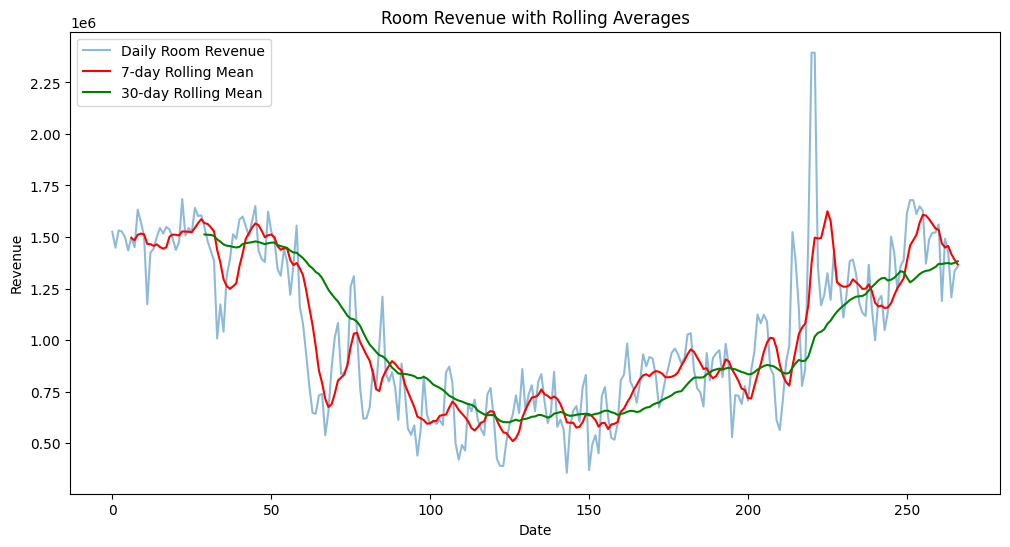

In [ ]:
df_1['Revenue_7d'] = df_1['Room Revenue'].rolling(7).mean()
df_1['Revenue_30d'] = df_1['Room Revenue'].rolling(30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_1.index, df_1['Room Revenue'], label='Daily Room Revenue', alpha=0.5)
plt.plot(df_1.index, df_1['Revenue_7d'], label='7-day Rolling Mean', color='red')
plt.plot(df_1.index, df_1['Revenue_30d'], label='30-day Rolling Mean', color='green')
plt.title('Room Revenue with Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


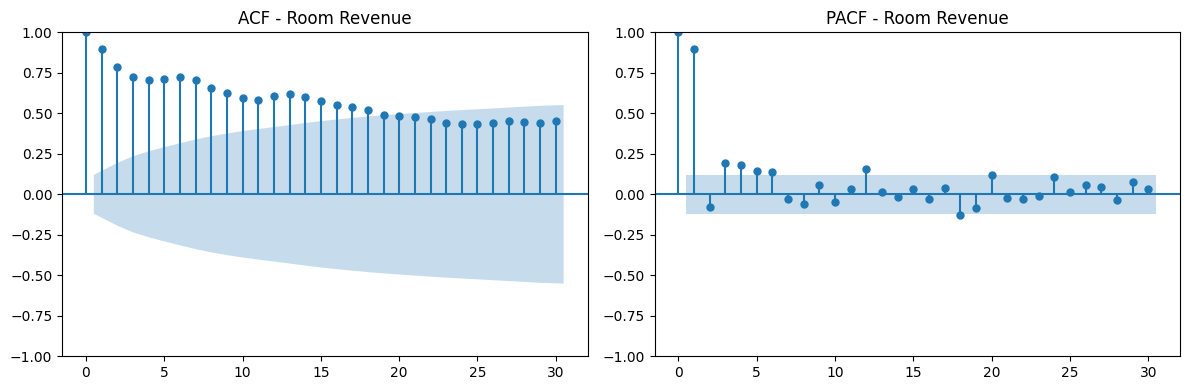

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_1['Room Revenue'].dropna(), ax=ax[0], lags=30)
ax[0].set_title('ACF - Room Revenue')

# Partial Autocorrelation
plot_pacf(df_1['Room Revenue'].dropna(), ax=ax[1], lags=30, method='ywm')
ax[1].set_title('PACF - Room Revenue')

plt.tight_layout()
plt.show()


### Analysis of ACF
- Our plot is decaying slowly, showing strong presence of autoregressive process (AR).
- This pattern is common in non-stationary time series, meaning the data might need differencing to achieve stationarity before modeling.

### Analysis of PACF
- The PACF cuts off after lag 1, with only the first lag being significant.
- This suggests that an AR(1) process might be appropriate for modeling this data.

In [23]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Suppose your DataFrame is df_1, indexed by Date
# and "Room Revenue" is the series to check.
series = df_1['Room Revenue'].dropna()  # ensure no NaNs

# Perform the ADF test
adf_result = adfuller(series, autolag='AIC')

# Extract results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}, {value}')


ADF Statistic: -1.4308653896143746
p-value: 0.5673927132275387
Critical Values:
   1%, -3.4562572510874396
   5%, -2.8729420379793598
   10%, -2.5728461399461744


### ADF Test Analysis
- p-value is more than 0.05, so we reach the conclusion that our data is *Non-Stationary*.
- ADF statistic *isn't more negative* than any critical values, which suggests *non-stationarity*.

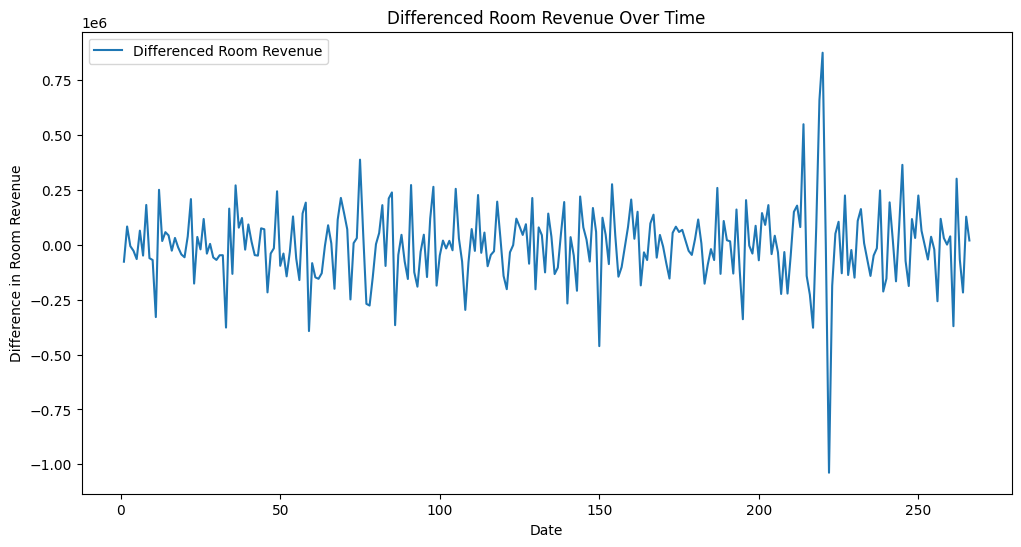

ADF Statistic (Diff): -7.142177899833405
p-value (Diff): 3.302355187808099e-10
Critical Values (Diff):
   1%: -3.4562572510874396
   5%: -2.8729420379793598
   10%: -2.5728461399461744


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Assuming your DataFrame is df_1 and Date is already set as the index:
# Compute the first-order difference
df_1['RoomRevenue_diff'] = df_1['Room Revenue'].diff()

# Drop the missing value resulting from differencing
diff_series = df_1['RoomRevenue_diff'].dropna()

# Plot the differenced series to visualize
plt.figure(figsize=(12, 6))
plt.plot(diff_series, label='Differenced Room Revenue')
plt.title('Differenced Room Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Difference in Room Revenue')
plt.legend()
plt.show()

# Run the Augmented Dickey-Fuller test on the differenced series
adf_result_diff = adfuller(diff_series, autolag='AIC')
print(f'ADF Statistic (Diff): {adf_result_diff[0]}')
print(f'p-value (Diff): {adf_result_diff[1]}')
print('Critical Values (Diff):')
for key, value in adf_result_diff[4].items():
    print(f'   {key}: {value}')


### After Differencing
- p-value is now 3.3×10^−10 < 0.05 and ADF statistic is now more negative than critical values.
- Now, data has become stationary.

### 20210901 - 20220331
### 20220401 - 20230205

### *Data Cleaning*

In [31]:
import pandas as pd

# File paths
file1_path = "History and Forecast CSV/History and Forecast Report-20210901 - 20220331_MF03.csv"
file2_path = "History and Forecast CSV/History and Forecast Report-20220401-20230205_MF03.csv"

# Step 1: Load dataset and inspect manually to determine correct header row
df1_raw = pd.read_csv(file1_path, skiprows=4, delimiter=",", engine="python")  # Adjust skiprows if needed
df2_raw = pd.read_csv(file2_path, skiprows=4, delimiter=",", engine="python")  # Adjust skiprows if needed

# Step 2: Drop completely empty columns
df1_raw.dropna(axis=1, how="all", inplace=True)
df2_raw.dropna(axis=1, how="all", inplace=True)

# Step 3: Drop rows that are entirely NaN
df1_raw.dropna(how="all", inplace=True)
df2_raw.dropna(how="all", inplace=True)

# Reset index
df1_raw.reset_index(drop=True, inplace=True)
df2_raw.reset_index(drop=True, inplace=True)

# Step 4: Ensure Date column is correctly formatted
df1_raw.rename(columns={df1_raw.columns[0]: "Date"}, inplace=True)
df2_raw.rename(columns={df2_raw.columns[0]: "Date"}, inplace=True)

df1_raw["Date"] = pd.to_datetime(df1_raw["Date"], errors="coerce")
df2_raw["Date"] = pd.to_datetime(df2_raw["Date"], errors="coerce")

# Step 5: Identify and convert numeric columns
numeric_columns = df1_raw.columns.difference(["Date", "Day"])
df1_raw[numeric_columns] = df1_raw[numeric_columns].apply(pd.to_numeric, errors="coerce")
df2_raw[numeric_columns] = df2_raw[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Step 6: Concatenate both datasets
df_combined_1 = pd.concat([df1_raw, df2_raw], ignore_index=True)

# Step 7: Handle missing values
df_combined_1.dropna(subset=["Date"], inplace=True)  # Remove rows with missing Date
# df_combined_1[numeric_columns] = df_combined_1[numeric_columns].fillna(df_combined_1[numeric_columns].median())  # Fill missing values

# Step 8: Drop redundant columns
redundant_columns = [col for col in df_combined_1.columns if df_combined_1[col].nunique() == 1]
# df_combined_1.drop(columns=redundant_columns, inplace=True, errors="ignore")
df_combined_1.reset_index(drop=True, inplace=True)
# df1_raw.head()

df_combined_1

,Date,Saleable,Booked,Arrival,Comp,House Use,Fit,Occ %,Room Rev,Average Rate,Dep Rooms,OOO Rooms,Total Pax
0,2021-01-09,117.0,117.0,49.0,1.0,6.0,117.0,94.0171,617835.21,5280.6428,45.0,15.0,172.0
1,2021-02-09,116.0,113.0,34.0,1.0,5.0,113.0,92.2414,620455.06,5490.7527,32.0,16.0,170.0
2,2021-03-09,118.0,116.0,39.0,0.0,4.0,116.0,94.9153,633071.92,5457.5165,35.0,14.0,169.0
3,2021-04-09,118.0,116.0,36.0,0.0,4.0,116.0,94.9153,682949.05,5887.4918,36.0,14.0,182.0
4,2021-05-09,119.0,114.0,36.0,0.0,1.0,114.0,94.9580,664046.94,5824.9731,38.0,13.0,182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2023-01-02,119.0,118.0,37.0,0.0,2.0,118.0,97.4790,1525371.79,12926.8795,33.0,11.0,155.0
205,2023-02-02,120.0,118.0,29.0,0.0,3.0,118.0,95.8333,1448656.84,12276.7528,29.0,10.0,159.0
206,2023-03-02,120.0,119.0,36.0,0.0,2.0,119.0,97.5000,1532358.27,12876.9602,35.0,10.0,173.0
207,2023-04-02,121.0,121.0,60.0,2.0,2.0,121.0,96.6942,1526782.32,12618.0357,60.0,9.0,189.0


In [ ]:
# Quick summary of columns, data types, and non-null counts
df_combined_1.info()

# Get descriptive statistics for numeric columns
df_combined_1.describe()

# Check how many missing values are in each column
df_combined_1.isnull().sum()


DataFrame shape: (209, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          209 non-null    datetime64[ns]
 1   Saleable      209 non-null    float64       
 2   Booked        209 non-null    float64       
 3   Arrival       209 non-null    float64       
 4   Comp          209 non-null    float64       
 5   House Use     209 non-null    float64       
 6   Fit           209 non-null    float64       
 7   Occ %         209 non-null    float64       
 8   Room Rev      209 non-null    float64       
 9   Average Rate  209 non-null    float64       
 10  Dep Rooms     209 non-null    float64       
 11  OOO Rooms     209 non-null    float64       
 12  Total Pax     209 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 21.4 KB


Date            0
Saleable        0
Booked          0
Arrival         0
Comp            0
House Use       0
Fit             0
Occ %           0
Room Rev        0
Average Rate    0
Dep Rooms       0
OOO Rooms       0
Total Pax       0
dtype: int64

### 20230206
### ....
### 20250113

### *Data Cleaning*

In [26]:
# import os
# import glob
# import numpy as np
# import pandas as pd

# # Columns expected from each CSV (exact match to your file headers)
# COLS = [
#     "Date",
#     "Day",
#     "Rooms Sold",
#     "Rooms for Sale",
#     "Arrival Rooms",
#     "Compliment Rooms",
#     "House Use",
#     "Hold",
#     "Individual Confirm",
#     "Individual Tentative",
#     "Group Confirm",
#     "Group Tentative",
#     "Occupancy %",
#     "Room Revenue",
#     "ARR",
#     "Inclusion Revenue",
#     "Departure Rooms",
#     "OOO Rooms",
#     "Pax",
#     "Individual Revenue",
#     "Individual ARR",
#     "Confirmed Group Revenue",
#     "Confirmed Group ARR",
#     "Tentative Group Revenue",
#     "Tentative Group ARR",
#     "Total Room Inventory"
# ]

# # Final column order: place snapshot_date, arrival_date, actual_or_forecast after the main 25 columns
# FINAL_COLS = COLS + ["snapshot_date", "arrival_date", "actual_or_forecast"]

# # 1) Directory with your CSV files
# csv_dir = 'History and Forecast CSV'

# # 2) List and sort all CSVs
# all_csv_files = sorted(glob.glob(os.path.join(csv_dir, '*.csv')))

# # 3) Skip first 3 and last file
# files_to_use = all_csv_files[3:-1]
# # print(f"All CSV files ({len(all_csv_files)}):\n", all_csv_files)
# # print(f"Using {len(files_to_use)} files (skipping first 3 & last):\n", files_to_use)

# combined_data = []

# for filepath in files_to_use:
#     # -------------------------------------------------------------------------
#     # (A) Parse snapshot_date from filename (assumes 'YYYYMMDD.csv')
#     filename = os.path.basename(filepath)          # e.g. "20250104.csv"
#     filedate_str = os.path.splitext(filename)[0]   # e.g. "20250104"
#     try:
#         snapshot_date = pd.to_datetime(filedate_str, format='%Y%m%d')
#     except ValueError:
#         # If the filenames are in a different format, adjust accordingly
#         snapshot_date = None

#     # -------------------------------------------------------------------------
#     # (B) Read CSV normally (no skiprows, because you have a real header)
#     df_temp = pd.read_csv(filepath, header=0)  # or header=None if there's no row of column headers
#     actual_row_index = 5
#     predicted_start_idx = 8
    
#     actual_row = df_temp.iloc[[actual_row_index]].copy()
#     predicted_rows = df_temp.iloc[predicted_start_idx:].copy()

#     # Step C: combine them
#     df_temp = pd.concat([actual_row, predicted_rows], ignore_index=True)
    
#     print(f"\n--- Reading file: {filepath} ---")
#     print(df_temp.head(10))
#     print("Column names detected by pandas:", df_temp.columns)

    
#     # Optional: ensure the columns appear in your expected order;
#     # If the file is missing columns or has extras, reindex can handle it:
#     df_temp = df_temp.reindex(columns=COLS)

#     # -------------------------------------------------------------------------
#     # (C) Add the snapshot_date column
#     df_temp['snapshot_date'] = snapshot_date

#     # -------------------------------------------------------------------------
#     # (D) Convert the "Date" column to datetime => arrival_date
#     #     *If* your "Date" column is something like "DD-MM-YYYY", adjust format.
#     #     If it's already a standard ISO format (YYYY-MM-DD), you can do:
#     #        pd.to_datetime(df_temp["Date"], errors="coerce")
#     df_temp['arrival_date'] = pd.to_datetime(df_temp["Date"], errors='coerce')
    
#     # (E) Mark rows as 'actual' vs 'forecast'
#     # A typical assumption:
#     #   if arrival_date == snapshot_date => 'actual'
#     #   else => 'forecast'
#     # But you can refine if you have prior days or other logic.
#     df_temp['actual_or_forecast'] = np.where(
#         df_temp['arrival_date'] == df_temp['snapshot_date'],
#         'actual',
#         'forecast'
#     )

#     # (F) Reorder columns to the final set
#     df_temp = df_temp.reindex(columns=FINAL_COLS)

#     # (G) Append to the master list
#     combined_data.append(df_temp)

# # 4) Concatenate all data
# df_comb = pd.concat(combined_data, ignore_index=True)

# print("\nFinal MASTER table shape:", df_comb.shape)
# print(df_comb.head(10))

In [27]:
import os
import glob
import numpy as np
import pandas as pd

# Columns expected from each CSV
COLS = [
    "Date","Day","Rooms Sold","Rooms for Sale","Arrival Rooms","Compliment Rooms",
    "House Use","Hold","Individual Confirm","Individual Tentative",
    "Group Confirm","Group Tentative","Occupancy %","Room Revenue","ARR",
    "Inclusion Revenue","Departure Rooms","OOO Rooms","Pax",
    "Individual Revenue","Individual ARR","Confirmed Group Revenue","Confirmed Group ARR",
    "Tentative Group Revenue","Tentative Group ARR","Total Room Inventory"
]

FINAL_COLS = COLS + ["snapshot_date","arrival_date","actual_or_forecast"]

# 1) Directory containing your CSV files
csv_dir = "History and Forecast CSV"

# 2) List all CSVs, then skip first 3 and the last
all_csv_files = sorted(glob.glob(os.path.join(csv_dir, "*.csv")))
files_to_use = all_csv_files[3:-1]

print(f"Found {len(all_csv_files)} CSV files in {csv_dir}")
print("Skipping first 3 and last file, using these CSVs:")
# for f in files_to_use:
#     print("  ", f)

combined_data = []

for filepath in files_to_use:
    # A) Parse snapshot_date from filename
    filename = os.path.basename(filepath)             # e.g. "20250113_History_and_Forecast_Report.csv"
    filedate_str = os.path.splitext(filename)[0]      # e.g. "20250113_History_and_Forecast_Report"
    
    # Optional: If your date is strictly at start (YYYYMMDD), parse that slice:
    # For instance, if your filename is "History and Forecast Report-20250113_History_and_Forecast_Report.csv"
    # you might extract the substring after "Report-" and before "_History":
    # e.g. "20250113"
    # Then parse that as snapshot_date:
    try:
        # Example: find the substring that is your 8-digit date
        # adjust logic depending on your real filenames
        # Here, let's just do a simplistic approach:
        date_part = filedate_str.split("-")[-1].replace("_History_and_Forecast_Report","")
        snapshot_date = pd.to_datetime(date_part, format="%Y%m%d", errors="coerce")
    except ValueError:
        snapshot_date = None

    # print(f"\n--- READING FILE: {filepath}")
    # print("Parsed snapshot_date =", snapshot_date)

    # B) Read CSV, skipping top 3 lines so line 4 is the header row
    #    Adjust skiprows if needed; from your screenshots it looked like:
    #      1) "History and Forecast Report ..."
    #      2) "The Claridges"
    #      3) "Date From: ... Date To: ..."
    #    Then line 4 = real header: "Date,Day,Rooms Sold, ..."
    df_temp = pd.read_csv(filepath, skiprows=3, header=0)
    
    # print("Initial columns read:", df_temp.columns.tolist())
    # print(df_temp.head(5))

    # C) Drop the row with "Total (History)" if it appears in 'Day'
    #    Also drop any blank lines
    # df_temp = df_temp[df_temp["Day"] != "Total (History)"]
    # Modify the filtering condition to exclude multiple values
    df_temp = df_temp[~df_temp["Day"].isin(["Total (History)", "Total (Forecast)", "Grand Total"])]
  
    df_temp.dropna(subset=["Date","Day"], how="all", inplace=True)

    # D) Optionally separate the "actual" row (the first row in the data)
    #    from the forecast rows (the rest). Typically row 0 is your actual day, 
    #    row 1+ = forecast. But only do this if the file structure is consistent.
    #    Otherwise you can keep them all in df_temp. 
    df_temp.reset_index(drop=True, inplace=True)

    # If you truly know that row 0 is actual, row 1+ is forecast, do:
    # actual_row = df_temp.iloc[[0]].copy()
    # forecast_rows = df_temp.iloc[1:].copy()
    # df_temp = pd.concat([actual_row, forecast_rows], ignore_index=True)

    # E) Reindex columns to ensure they match your expected COLS exactly
    #    If the file has extra columns or missing columns, you'll see NaN or lose data here.
    df_temp = df_temp.reindex(columns=COLS)

    # F) Add snapshot_date
    df_temp["snapshot_date"] = snapshot_date

    # G) Convert "Date" column to a datetime
    df_temp["arrival_date"] = pd.to_datetime(df_temp["Date"], errors="coerce")

    # H) Mark rows as 'actual' vs 'forecast'
    #    Simple assumption: if arrival_date == snapshot_date => 'actual', else 'forecast'
    df_temp["actual_or_forecast"] = np.where(
        df_temp["arrival_date"] == df_temp["snapshot_date"],
        "actual",
        "forecast"
    )

    # I) Reorder final columns
    df_temp = df_temp.reindex(columns=FINAL_COLS)

    # J) Append to combined list
    combined_data.append(df_temp)

# 3) Concatenate
df_comb_daywise = pd.concat(combined_data, ignore_index=True)
print("\nFINAL Master shape:", df_comb_daywise.shape)
print(df_comb_daywise.head(10))


Found 685 CSV files in History and Forecast CSV
Skipping first 3 and last file, using these CSVs:

FINAL Master shape: (124367, 29)
                  Date        Day  Rooms Sold  Rooms for Sale  Arrival Rooms  \
0  2023-02-05 00:00:00     Sunday       105.0             8.0           50.0   
1  2023-02-06 00:00:00     Monday       101.0            12.0           68.0   
2  2023-02-07 00:00:00    Tuesday       113.0             3.0           31.0   
3  2023-02-08 00:00:00  Wednesday       114.0             3.0           34.0   
4  2023-02-09 00:00:00   Thursday       115.0             0.0           36.0   
5  2023-02-10 00:00:00     Friday       109.0             7.0           51.0   
6  2023-02-11 00:00:00   Saturday       113.0             2.0           49.0   
7  2023-02-12 00:00:00     Sunday        99.0            15.0           30.0   
8  2023-02-13 00:00:00     Monday       111.0             6.0           28.0   
9  2023-02-14 00:00:00    Tuesday        83.0            35.0       

In [28]:
# Get summary statistics for numeric columns
summary_stats_daywise = df_comb_daywise.describe()

# Check missing values
missing_values_daywise = df_comb_daywise.isnull().sum()

summary_stats_daywise, missing_values_daywise



(          Rooms Sold  Rooms for Sale  Arrival Rooms  Compliment Rooms  \
 count  124367.000000   124367.000000  124367.000000     124367.000000   
 mean       45.327812       73.467889      12.674801          0.250034   
 min        -1.000000      -17.000000       0.000000          0.000000   
 25%        12.000000       37.000000       2.000000          0.000000   
 50%        36.000000       84.000000       7.000000          0.000000   
 75%        76.000000      111.000000      20.000000          0.000000   
 max       134.000000      124.000000     102.000000         12.000000   
 std        37.711990       40.936315      14.474519          0.786890   
 
            House Use      Hold  Individual Confirm  Individual Tentative  \
 count  124367.000000  124313.0       124367.000000         124367.000000   
 mean        0.702871       0.0           11.499071             14.206116   
 min         0.000000       0.0            0.000000              0.000000   
 25%         0.000000   

In [29]:
import pandas as pd

# Assuming df_comb is the DataFrame from the provided data

# Convert 'Date' columns to proper datetime format
date_columns = ['Date', 'snapshot_date', 'arrival_date']
for col in date_columns:
    if col in df_comb_daywise.columns:
        df_comb_daywise[col] = pd.to_datetime(df_comb_daywise[col], errors='coerce')

# Drop columns with only one unique value (e.g., all 0s)
unique_counts = df_comb_daywise.nunique()
cols_to_drop = unique_counts[unique_counts == 1].index
df_comb_daywise = df_comb_daywise.drop(columns=cols_to_drop)

# Drop rows that have empty (NaN) columns
df_comb_daywise = df_comb_daywise.dropna()

df_comb_daywise.isnull().sum()

Date                       0
Day                        0
Rooms Sold                 0
Rooms for Sale             0
Arrival Rooms              0
Compliment Rooms           0
House Use                  0
Individual Confirm         0
Individual Tentative       0
Group Confirm              0
Group Tentative            0
Occupancy %                0
Room Revenue               0
ARR                        0
Departure Rooms            0
OOO Rooms                  0
Pax                        0
Individual Revenue         0
Individual ARR             0
Confirmed Group Revenue    0
Confirmed Group ARR        0
Total Room Inventory       0
snapshot_date              0
arrival_date               0
actual_or_forecast         0
dtype: int64

In [ ]:
print("Days of week found:", df_comb_daywise['Day'].unique())
print("Forecast flag:", df_comb_daywise['actual_or_forecast'].value_counts())

Days of week found: ['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
Forecast flag: actual_or_forecast
forecast    123247
actual         677
Name: count, dtype: int64


### EDA

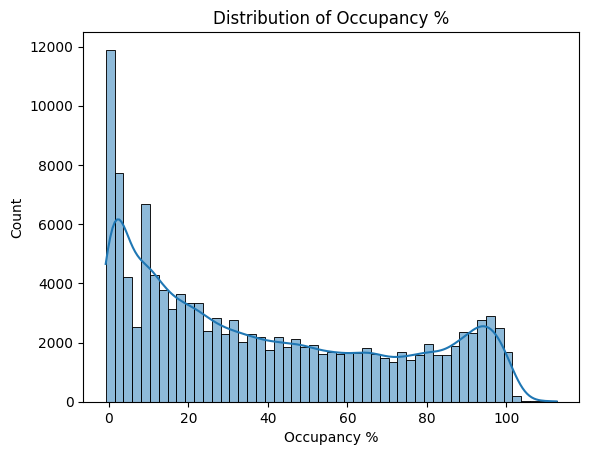

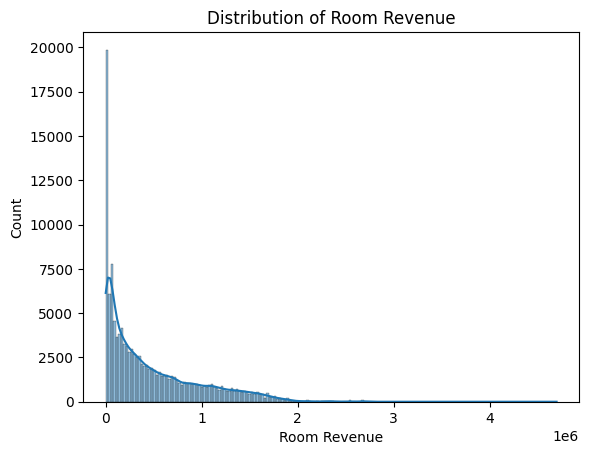

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_comb_daywise['Occupancy %'].dropna(), kde=True)
plt.title("Distribution of Occupancy %")
plt.show()

sns.histplot(df_comb_daywise['Room Revenue'].dropna(), kde=True)
plt.title("Distribution of Room Revenue")
plt.show()


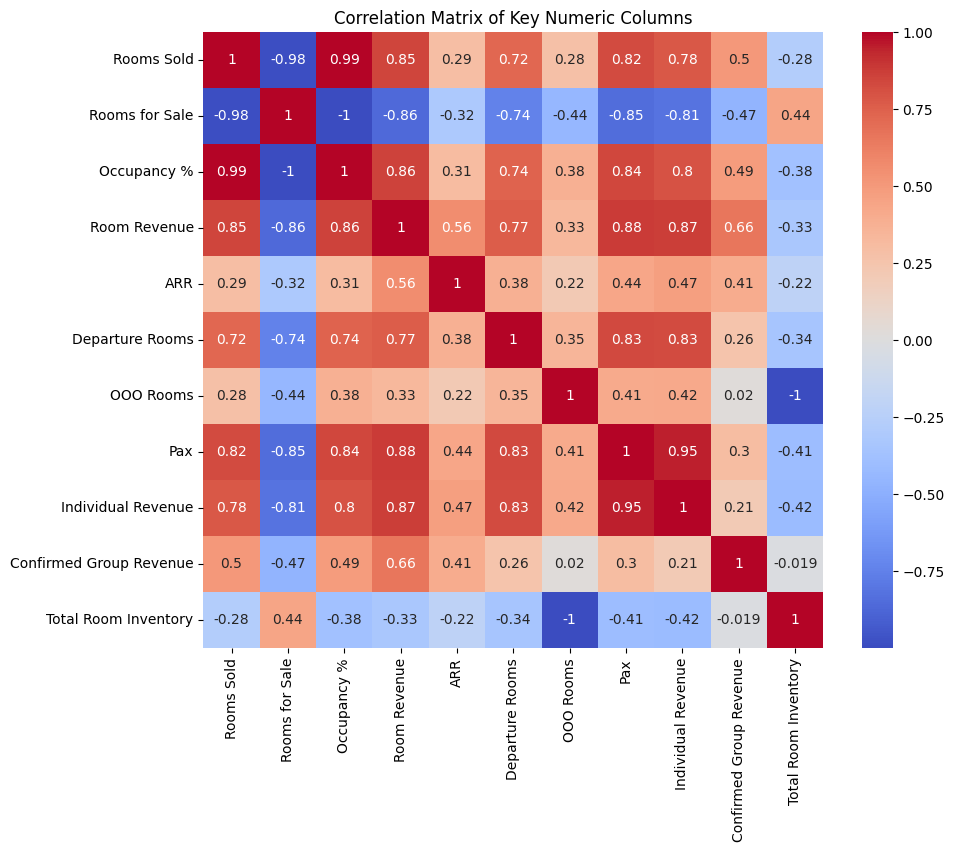

In [32]:
numeric_cols = ['Rooms Sold','Rooms for Sale','Occupancy %','Room Revenue','ARR','Departure Rooms','OOO Rooms','Pax','Individual Revenue','Confirmed Group Revenue','Total Room Inventory']
df_numeric = df_comb_daywise[numeric_cols].dropna()
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Key Numeric Columns")
plt.show()


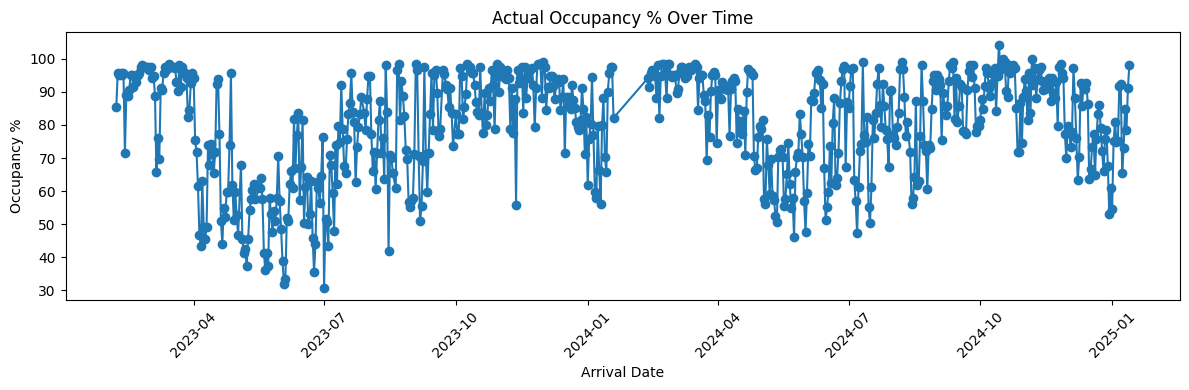

In [33]:
df_actual = df_comb_daywise[df_comb_daywise['actual_or_forecast'] == 'actual'].copy()
# Sort by arrival_date
df_actual.sort_values('arrival_date', inplace=True)

plt.figure(figsize=(12,4))
plt.plot(df_actual['arrival_date'], df_actual['Occupancy %'], marker='o')
plt.title("Actual Occupancy % Over Time")
plt.xlabel("Arrival Date")
plt.ylabel("Occupancy %")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Day
Tuesday      34.182826
Wednesday    36.565931
Monday       37.722279
Thursday     39.461992
Sunday       39.616170
Friday       40.531781
Saturday     41.867349
Name: Occupancy %, dtype: float64


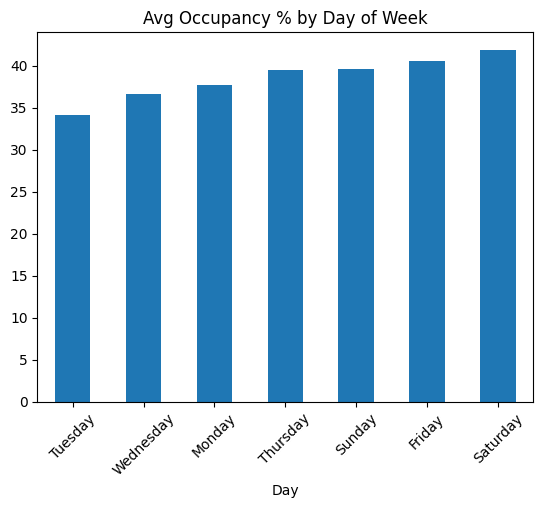

In [34]:
day_of_week_summary = df_comb_daywise.groupby('Day')['Occupancy %'].mean().sort_values()
print(day_of_week_summary)

day_of_week_summary.plot(kind='bar', rot=45, title="Avg Occupancy % by Day of Week")
plt.show()


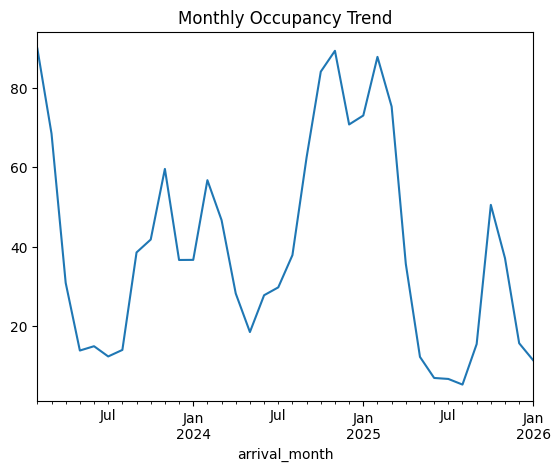

In [35]:
# Suppose "arrival_date" is your main date
df_comb_daywise['arrival_month'] = df_comb_daywise['arrival_date'].dt.to_period("M")
monthly_occ = df_comb_daywise.groupby('arrival_month')['Occupancy %'].mean()
monthly_occ.plot(kind='line')
plt.title("Monthly Occupancy Trend")
plt.show()


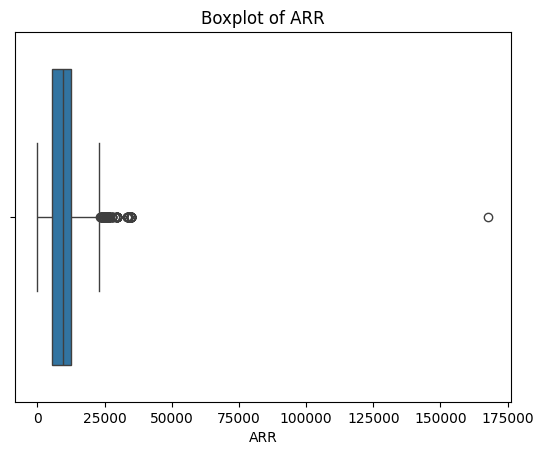

In [36]:
sns.boxplot(x=df_comb_daywise['ARR'])
plt.title("Boxplot of ARR")
plt.show()

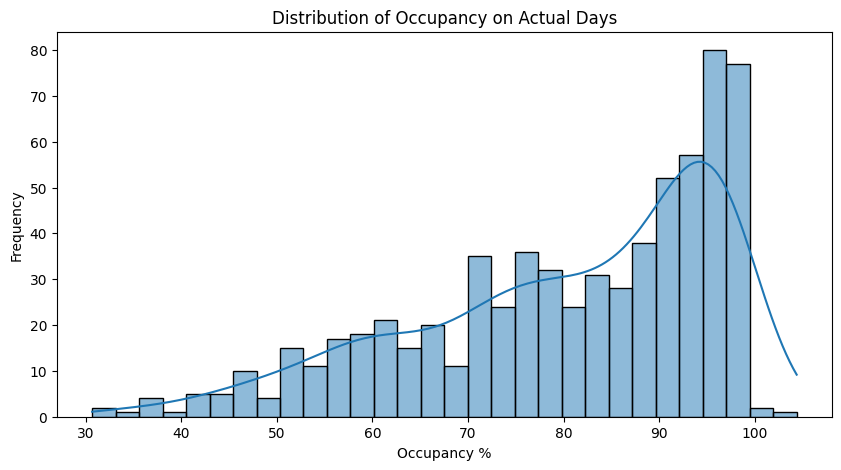

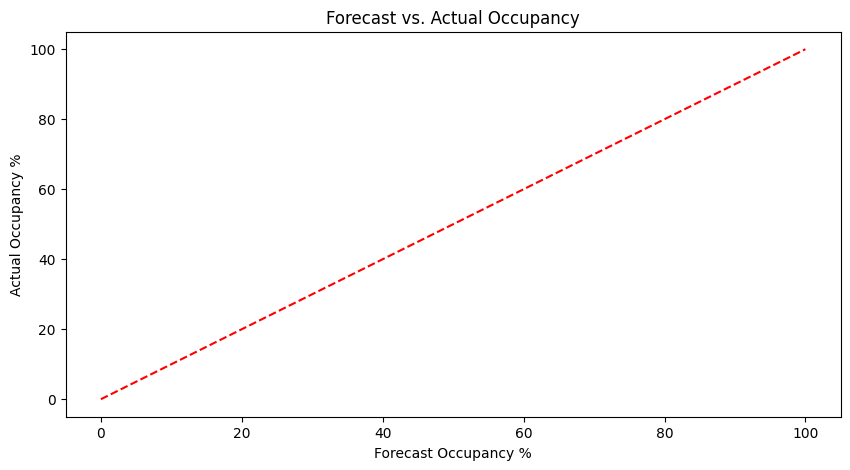

C:\Users\praya\AppData\Local\Temp\ipykernel_21624\1910039859.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_comb_daywise, x="lead_time", y="Occupancy %", hue="actual_or_forecast", ci=None)


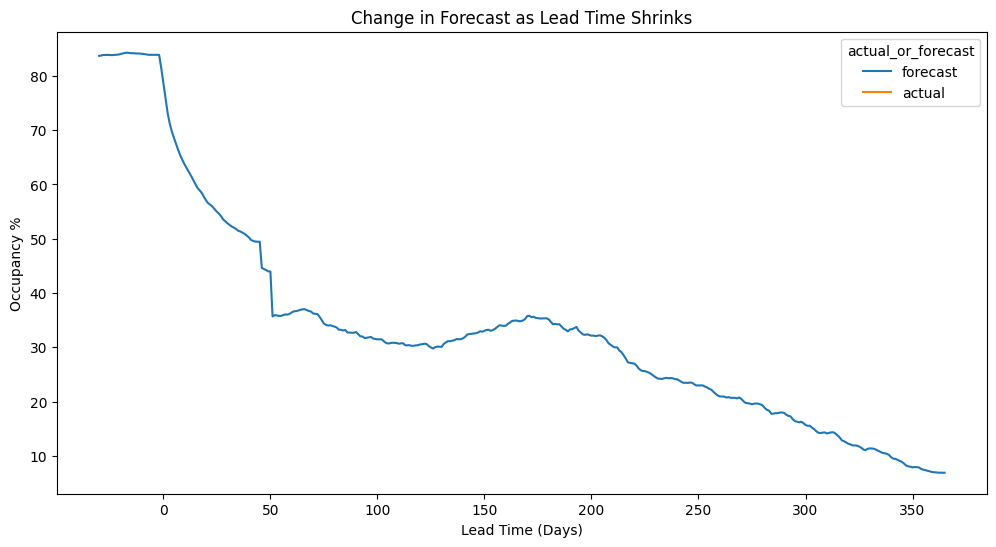

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of occupancy on actual days
actual_days = df_comb_daywise.query("actual_or_forecast == 'actual'")

plt.figure(figsize=(10, 5))
sns.histplot(actual_days["Occupancy %"], bins=30, kde=True)
plt.title("Distribution of Occupancy on Actual Days")
plt.xlabel("Occupancy %")
plt.ylabel("Frequency")
plt.show()

# 2. Compare forecast vs. actual for the same (snapshot_date, arrival_date)
comparison_df = df_comb_daywise.pivot_table(
    index=["snapshot_date", "arrival_date"], 
    columns="actual_or_forecast", 
    values="Occupancy %"
).dropna()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=comparison_df, x="forecast", y="actual")
plt.plot([0, 100], [0, 100], linestyle="--", color="red")  # Reference line
plt.title("Forecast vs. Actual Occupancy")
plt.xlabel("Forecast Occupancy %")
plt.ylabel("Actual Occupancy %")
plt.show()

# 3. Plot how the forecast changes as lead time shrinks
df_comb_daywise["lead_time"] = (df_comb_daywise["arrival_date"] - df_comb_daywise["snapshot_date"]).dt.days

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_comb_daywise, x="lead_time", y="Occupancy %", hue="actual_or_forecast", ci=None)
plt.title("Change in Forecast as Lead Time Shrinks")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Occupancy %")
plt.show()


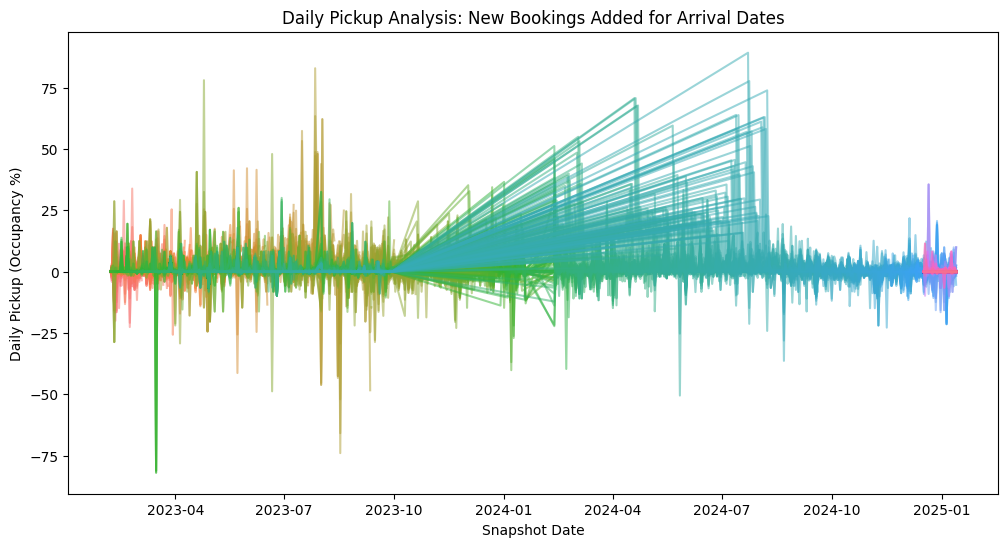

In [ ]:

# # Ensure data is sorted by snapshot_date for accurate pickup analysis
# df_comb_daywise = df_comb_daywise.sort_values(by=["arrival_date", "snapshot_date"])

# # Compute the daily pickup by subtracting occupancy from the previous snapshot
# df_comb_daywise["pickup"] = df_comb_daywise.groupby("arrival_date")["Occupancy %"].diff().fillna(0)

# plt.figure(figsize=(12, 6))
# sns.lineplot(data=df_comb_daywise, x="snapshot_date", y="pickup", hue="arrival_date", alpha=0.5, legend=False)
# plt.title("Daily Pickup Analysis: New Bookings Added for Arrival Dates")
# plt.xlabel("Snapshot Date")
# plt.ylabel("Daily Pickup (Occupancy %)")
# plt.show()